<div dir="rtl" class="alert alert-block alert-info"> <font size="5" face="HM XNiloofar"> 
<b> روش‌های ریاضی در مهندسی - دکتر امینی: تمرین شبیه‌سازی </b>
</font> </div>

<div dir="rtl"> <font size="4" face="HM XNiloofar"> 
<br />
مهلت تحویل تمرین: ۶ مرداد ۱۴۰۱ <br />
فقط قسمت‌های <code>TODO</code> را پر کنید و  Jupyter Notebook تکمیل شده را به فرمت <code>ipynb</code> و <code>html</code> به عنوان گزارش خود در CW آپلود کنید. <br />
ابهامات و سوالات خود در مورد این تمرین را می توانید با طراح تمرین مطرح کنید. <br />
<div dir="ltr">@hamidreza_ehteram </div> <br />  
در این تمرین شما با روش‌های عددی در تجزیه‌های ماتریسی و یادگیری واژه‌نامه به منظور نویززدایی تصاویر  آشنا می‌شوید. <br />
</font> </div>

***You can jump directly to these sections:***

+ [A. Matrix Decompositions](#A.-Matrix-Decompositions)
    + [1. Schur](#1.-Schur)
    + [2. SVD](#2.-SVD)
    + [3. Cholesky](#3.-Cholesky)
    + [4. QR](#4.-QR)
+ [B. Dictionary Learning](#B.-Dictionary-Learning)
    + [1. Create dataset](#1.-Create-dataset)
    + [2. Initialize dictionary](#2.-Initialize-dictionary)    
    + [3. Learn dictionary](#3.-Learn-dictionary) 
    + [4. Reconstruct image](#4.-Reconstruct-image)     
    + [5. Evaluation](#5.-Evaluation)     
+ [Give Us Feedback](#Give-Us-Feedback)

---

# A. Matrix Decompositions

In [ ]:
# The allowed libraries
import time
import numpy as np
from math import sqrt

## 1. Schur


$$A \in \mathbb{R}^{n\times n} \text{ is a symmetric matrix} \iff \exists \text{ an orthogonal matrix } Q: Q^\top A Q = \Lambda = \text{diag}(\lambda_1,\ldots,\lambda_n)$$

<div dir="rtl"> <font size="4" face="HM XNiloofar">
الگوریتم jacobi را در حالت  cyclic پیاده‌سازی کنید.
</font> </div>

```python
d, Q = my_schur(A)
```

<div dir="rtl"> <font size="4" face="HM XNiloofar"> 
ورودی یک ماتریس متقارن حقیقی دلخواه و خروجی مقادیر ویژه و بردار‌های ویژه متناظر در تجزیه schur است. 
<br />
Cell مربوط به ارزیابی کد را اجرا کنید. خروجی الگوریتم خود را با خروجی تابع numpy مقایسه کنید. درباره‌ی تفاوت‌ها توضیح دهید.
<br />
Cell تست زمان و صحت را جهت ارزیابی کارایی الگوریتم خود اجرا کنید.
</font> </div>

In [ ]:
def my_schur(A):
    n = np.shape(A)[0]
    thr = 10**-6 * np.linalg.norm(A)

    Q = np.eye(n)
    A2 = np.multiply(A,A)
    diag = np.diag(A2)
    off_A = np.sqrt(np.sum(A2) - np.sum(diag))

    while off_A > thr:
      for p in range(n):
        for q in range(p+1,n):
          #now we have p and q, so we shoould create j and go through it

          aqq = A[q,q]
          app = A[p,p]
          apq = A[p,q]

          if app == aqq:
            theta = 0.25 * np.pi * np.sign(apq)  
          else:
            theta = 0.5 * np.arctan(2*apq/(aqq - app))

          c = np.cos(theta)
          s = np.sin(theta)


          A1 = np.copy(A)
          A1[:, p] = c * A[:, p] - s * A[:, q]
          A1[:, q] = c * A[:, q] + s * A[:, p]
          A1[p, :] = c * A[p, :] - s * A[q, :]
          A1[q, :] = c * A[q, :] + s * A[p, :]
          A1[p, p] = app * (c**2) - 2 * apq * s * c + aqq * (s**2)
          A1[q, q] = aqq * (c**2) + 2 * apq * s * c + app * (s**2)
          A1[p, q] = 0
          A1[q, p] = 0

          Q1 = np.copy(Q)
          Q1[:, p] = c * Q[:, p] - s * Q[:, q]
          Q1[:, q] = s * Q[:, p] + c * Q[:, q]


          off_A = np.sqrt(off_A**2 - 2 * (apq ** 2))

          Q = np.copy(Q1)
          A = np.copy(A1)
    d = np.diag(A)      
    return d, Q

In [ ]:
# evaluate
n = 8
A = np.random.randn(n,n)
A = (A + A.transpose()) / 2

# numpy code
d, Q = np.linalg.eig(A.copy())
print(f'numpy| orthogonal test error ---> {np.linalg.norm(np.eye(n) - Q @ Q.T)}')
print(f'numpy| correctness test error ---> {np.linalg.norm(A - Q @ np.diag(d) @ Q.T)}')

# your code
my_d, my_Q = my_schur(A.copy())
print(f'yours| orthogonal test error ---> {np.linalg.norm(np.eye(n) - my_Q @ my_Q.T)}')
print(f'yours| correctness test error ---> {np.linalg.norm(A - my_Q @ np.diag(my_d) @ my_Q.T)}')

# print
print(f'A = \n{np.around(A, 3)}')
print(f'd = \n{np.around(d, 3)}')
print(f'my_d = \n{np.around(my_d, 3)}')
print(f'Q = \n{np.around(Q, 3)}')
print(f'my_Q = \n{np.around(my_Q, 3)}')

numpy| orthogonal test error ---> 2.698411991808442e-15
numpy| correctness test error ---> 7.934466647929284e-15
yours| orthogonal test error ---> 1.7525987469529987e-15
yours| correctness test error ---> 1.0351126135606434e-06
A = 
[[ 2.047  0.038 -0.408 -0.625  1.179  0.198 -1.053 -1.066]
 [ 0.038  0.804  1.988  0.183  0.763 -1.165  0.193 -0.045]
 [-0.408  1.988 -0.946 -1.547  0.403  0.878  0.401 -0.233]
 [-0.625  0.183 -1.547  0.426 -0.135 -1.226  0.528 -0.699]
 [ 1.179  0.763  0.403 -0.135  0.223  0.365  0.617 -0.65 ]
 [ 0.198 -1.165  0.878 -1.226  0.365  0.145  1.176  0.254]
 [-1.053  0.193  0.401  0.528  0.617  1.176 -0.852 -0.343]
 [-1.066 -0.045 -0.233 -0.699 -0.65   0.254 -0.343 -0.332]]
d = 
[ 3.34   2.65   2.349  1.047 -3.274 -2.418 -1.357 -0.823]
my_d = 
[ 3.34   2.65  -3.274  2.349  1.047 -1.357 -2.418 -0.823]
Q = 
[[ 0.747  0.444 -0.096  0.127  0.16   0.171 -0.405 -0.035]
 [ 0.218 -0.386  0.673  0.173 -0.464 -0.028 -0.322  0.001]
 [ 0.211 -0.538  0.107  0.084  0.727 -0.20

**Your answer: ```TODO ```**

In [ ]:
# time and correctness test
numpy_test = {'time': 0.0, 'orthogonal test error':0.0, 'correctness test error':0.0}
yours_test = {'time': 0.0, 'orthogonal test error':0.0, 'correctness test error':0.0}

num_test = 100
for i in range(num_test):
    n = np.random.randint(40, 50)
    A = np.random.randn(n,n)
    A = (A + A.transpose()) / 2

    # numpy code
    start_time = time.time()
    d, Q = np.linalg.eig(A.copy())
    
    numpy_test['time'] += time.time() - start_time
    numpy_test['orthogonal test error'] += np.linalg.norm(np.eye(n) - Q @ Q.T)
    numpy_test['correctness test error'] += np.linalg.norm(A - Q @ np.diag(d) @ Q.T)

    # your code
    start_time = time.time()
    my_d, my_Q = my_schur(A.copy())
    
    yours_test['time'] += time.time() - start_time
    yours_test['orthogonal test error'] += np.linalg.norm(np.eye(n) - my_Q @ my_Q.T)
    yours_test['correctness test error'] += np.linalg.norm(A - my_Q @ np.diag(my_d) @ my_Q.T)

for name in numpy_test:
    numpy_test[name] /= num_test
    yours_test[name] /= num_test

yours_check = {'time': yours_test['time'] <= 0.5, 
               'orthogonal test error': yours_test['orthogonal test error'] <= 1e-5, 
               'correctness test error': yours_test['correctness test error'] <= 1e-5}

print(f'numpy| test ---> {numpy_test}')
print(f'yours| test ---> {yours_test}')
print(f'yours| check ---> {yours_check}')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in sqrt


numpy| test ---> {'time': 0.0010151052474975586, 'orthogonal test error': 3.824593455105633e-14, 'correctness test error': 1.9187856210865137e-13}
yours| test ---> {'time': 0.3786067771911621, 'orthogonal test error': 1.2804712425467693e-14, 'correctness test error': 5.403488781525422e-06}
yours| check ---> {'time': True, 'orthogonal test error': True, 'correctness test error': True}


## 2. SVD

$$A \in \mathbb{R}^{m\times n} \text{ is a matrix} \iff \exists \text{ two orthogonal matrices } U \text{ and } V: U^\top A V = \Sigma = \text{diag}(\sigma_1,\ldots,\sigma_p), p=\min\{m,n\}, \sigma_1 \geq \ldots \geq \sigma_p \geq 0$$

<div dir="rtl"> <font size="4" face="HM XNiloofar">
الگوریتم two-sided را در حالت  cyclic پیاده‌سازی کنید.
</font> </div>

```python
U, s, VT = my_svd(A)
```

<div dir="rtl"> <font size="4" face="HM XNiloofar"> 
ورودی یک ماتریس حقیقی دلخواه و خروجی ماتریس بردارهای تکین چپ، مقادیر تکین و ترانهاده ماتریس بردارهای تکین راست است. 
<br />
<b>ملاحظه.</b> الگوریتم شما باید ماتریس‌های خروجی را به صورتی به دست آورد که مقادیر تکین مثبت و نزولی باشند
<br />
Cell مربوط به ارزیابی کد را اجرا کنید. خروجی الگوریتم خود را با خروجی تابع numpy مقایسه کنید. درباره‌ی تفاوت‌ها توضیح دهید.
<br />
Cell تست زمان و صحت را جهت ارزیابی کارایی الگوریتم خود اجرا کنید.
</font> </div>

In [ ]:
def my_svd(A):
    
    # TODO
    m = A.shape[0]
    n = A.shape[1]

    V = np.eye(n)
    U = np.eye(m)

    A2 = np.multiply(A,A)
    diag = np.diag(A2)
    off_A = np.sqrt(np.sum(A2) - np.sum(diag))
    thr = 10**(-7)*np.linalg.norm(A)
    
    
    while off_A>thr:
      if m < n:
        for p in range(m):
            for q in range(p+1,m):
                ################### Making Symmetric ################# 

                if A[q,q] == -A[p,p] and A[p,q] == A[q,p]:
                  alpha = 0
                if A[q,q] == -A[p,p] and A[p,q] != A[q,p]:
                  alpha = 0.5 * np.pi * np.sign(A[p,q] - A[q,p])
                if A[q,q] != A[p,p]:
                  alpha = np.arctan((A[p,q] - A[q,p]) / (A[p,p] + A[q,q]))
              
                c = np.cos(alpha)
                s = np.sin(alpha)

                A1 = np.copy(A)

                A1[p, :] = c * A[p, :] - s * A[q, :]
                A1[q, :] = c * A[q, :] + s * A[p, :]

                off_A = np.sqrt(off_A**2 - (A[p,q] ** 2 + A[q,p] ** 2) + 2 * (A1[p,q] ** 2))

                A = np.copy(A1)

                U1 = np.copy(U)

                U1[p, :] = c * U[p, :] - s * U[q, :]
                U1[q, :] = c * U[q, :] + s * U[p, :]

                U = np.copy(U1)
                
                
                ######################### Making squared matrix ##################
                if A[p,p] == A[q,q]:
                  theta = 0.25 * np.pi * np.sign(A[p,q])  
                else:
                  theta = 0.5 * np.arctan(2*A[p,q]/(A[q,q] - A[p,p]))

                c = np.cos(theta)
                s = np.sin(theta)


                A1 = np.copy(A)
                A1[:, p] = c * A[:, p] - s * A[:, q]
                A1[:, q] = c * A[:, q] + s * A[:, p]
                A1[p, :] = c * A[p, :] - s * A[q, :]
                A1[q, :] = c * A[q, :] + s * A[p, :]
                A1[p, p] = A[p,p] * (c**2) - 2 * A[p,q] * s * c + A[q,q] * (s**2)
                A1[q, q] = A[q,q] * (c**2) + 2 * A[p,q] * s * c + A[p,p] * (s**2)
                A1[p, q] = 0
                A1[q, p] = 0

                V1 = np.copy(V)
                V1[:, p] = c * V[:, p] - s * V[:, q]
                V1[:, q] = s * V[:, p] + c * V[:, q]

                V = np.copy(V1)

                U1 = np.copy(U)
                U1[p, :] = c * U[p, :] - s * U[q, :]
                U1[q, :] = c * U[q, :] + s * U[p, :]
                U = np.copy(U1)

                off_A = np.sqrt(off_A**2 - 2 * (A[p,q] ** 2))

                A = np.copy(A1)

                a11 = A[p,p]
                a12 = A[p,q]
                a21 = A[q,p]
                a22 = A[q,q] 
                
            for q in range(m,n):
              xi = A[p,p]
              xj = A[p,q]
              den = np.sqrt(xi**2 + xj**2)
              c = xi / den
              s = -xj / den

              A1 = np.copy(A)
              A1[:, p] = c * A[:, p] - s * A[:, q]
              A1[:, q] = c * A[:, q] + s * A[:, p]

              V1 = np.copy(V)
              V1[:, p] = c * V[:, p] - s * V[:, q]
              V1[:, q] = c * V[:, q] + s * V[:, p]
              V = np.copy(V1)

              off_A = np.sqrt(off_A**2 - (A[p,q] ** 2))
                  
              A = np.copy(A1)
      elif m > n:
        for p in range(n):
            for q in range(p+1,n):
                ################### Making Symmetric ################# 
                if A[q,q] == -A[p,p] and A[p,q] == A[q,p]:
                  alpha = 0
                if A[q,q] == -A[p,p] and A[p,q] != A[q,p]:
                  alpha = 0.5 * np.pi * np.sign(A[p,q] - A[q,p])
                if A[q,q] != A[p,p]:
                  alpha = np.arctan((A[p,q] - A[q,p]) / (A[p,p] + A[q,q]))
              
                c = np.cos(alpha)
                s = np.sin(alpha)

                A1 = np.copy(A)

                A1[p, :] = c * A[p, :] - s * A[q, :]
                A1[q, :] = c * A[q, :] + s * A[p, :]

                off_A = np.sqrt(off_A**2 - (A[p,q] ** 2 + A[q,p] ** 2) + 2 * (A1[p,q] ** 2))
                A = np.copy(A1) 

                U1 = np.copy(U)
                U1[p, :] = c * U[p, :] - s * U[q, :]
                U1[q, :] = c * U[q, :] + s * U[p, :]
                U = np.copy(U1)
                
                
                ######################### Making squared matrix ##################

                if A[p,p] == A[q,q]:
                  theta = 0.25 * np.pi * np.sign(A[p,q])  
                else:
                  theta = 0.5 * np.arctan(2*A[p,q]/(A[q,q] - A[p,p]))

                c = np.cos(theta)
                s = np.sin(theta)


                A1 = np.copy(A)
                A1[:, p] = c * A[:, p] - s * A[:, q]
                A1[:, q] = c * A[:, q] + s * A[:, p]
                A1[p, :] = c * A[p, :] - s * A[q, :]
                A1[q, :] = c * A[q, :] + s * A[p, :]
                A1[p, p] = A[p,p] * (c**2) - 2 * A[p,q] * s * c + A[q,q] * (s**2)
                A1[q, q] = A[q,q] * (c**2) + 2 * A[p,q] * s * c + A[p,p] * (s**2)
                A1[p, q] = 0
                A1[q, p] = 0

                V1 = np.copy(V)
                V1[:, p] = c * V[:, p] - s * V[:, q]
                V1[:, q] = s * V[:, p] + c * V[:, q]
                V = np.copy(V1)

                U1 = np.copy(U)
                U1[p, :] = c * U[p, :] - s * U[q, :]
                U1[q, :] = c * U[q, :] + s * U[p, :]
                U = np.copy(U1)

                off_A = np.sqrt(off_A**2 - 2 * (A[p,q] ** 2))
                A = np.copy(A1) 
                  
            for q in range(n, m):
                xi = A[p,p]
                xj = A[q,p]
                den = np.sqrt(xi**2 + xj**2)
                c = xi / den
                s = -xj / den

                A1 = np.copy(A)
                A1[p, :] = c * A[p, :] - s * A[q, :]
                A1[q, :] = c * A[q, :] + s * A[p, :]

                U1 = np.copy(U)
                U1[p, :] = c * U[p, :] - s * U[q, :]
                U1[q, :] = c * U[q, :] + s * U[p, :]
                U = np.copy(U1)

                off_A = np.sqrt(off_A**2 - (A[q,p] ** 2))
                  
                A = np.copy(A1)
                
      else:
        for p in range(n):
              for q in range(p+1,n):
                ################### Making Symmetric ################# 
                if A[q,q] == -A[p,p] and A[p,q] == A[q,p]:
                  alpha = 0
                if A[q,q] == -A[p,p] and A[p,q] != A[q,p]:
                  alpha = 0.5 * np.pi * np.sign(A[p,q] - A[q,p])
                if A[q,q] != A[p,p]:
                  alpha = np.arctan((A[p,q] - A[q,p]) / (A[p,p] + A[q,q]))
              
                c = np.cos(alpha)
                s = np.sin(alpha)

                A1 = np.copy(A)

                A1[p, :] = c * A[p, :] - s * A[q, :]
                A1[q, :] = c * A[q, :] + s * A[p, :]

                off_A = np.sqrt(off_A**2 - (A[p,q] ** 2 + A[q,p] ** 2) + 2 * (A1[p,q] ** 2))

                A = np.copy(A1)

                U1 = np.copy(U)

                U1[p, :] = c * U[p, :] - s * U[q, :]
                U1[q, :] = c * U[q, :] + s * U[p, :]

                U = np.copy(U1)
                
                
                ######################### Making squared matrix ##################

                if A[p,p] == A[q,q]:
                  theta = 0.25 * np.pi * np.sign(A[p,q])  
                else:
                  theta = 0.5 * np.arctan(2*A[p,q]/(A[q,q] - A[p,p]))

                c = np.cos(theta)
                s = np.sin(theta)


                A1 = np.copy(A)
                A1[:, p] = c * A[:, p] - s * A[:, q]
                A1[:, q] = c * A[:, q] + s * A[:, p]
                A1[p, :] = c * A[p, :] - s * A[q, :]
                A1[q, :] = c * A[q, :] + s * A[p, :]
                A1[p, p] = A[p,p] * (c**2) - 2 * A[p,q] * s * c + A[q,q] * (s**2)
                A1[q, q] = A[q,q] * (c**2) + 2 * A[p,q] * s * c + A[p,p] * (s**2)
                A1[p, q] = 0
                A1[q, p] = 0

                V1 = np.copy(V)
                V1[:, p] = c * V[:, p] - s * V[:, q]
                V1[:, q] = s * V[:, p] + c * V[:, q]
                V = np.copy(V1)

                U1 = np.copy(U)
                U1[p, :] = c * U[p, :] - s * U[q, :]
                U1[q, :] = c * U[q, :] + s * U[p, :]
                U = np.copy(U1)

                off_A = np.sqrt(off_A**2 - 2 * (A[p,q] ** 2))
                A = np.copy(A1)


    s = np.diag(A)
    U = U.T
    VT = V.T
    
    return U, s, VT

In [ ]:
# evaluate
m, n = 8, 6
A = np.random.randn(m,n)

# numpy code
U, s, VT = np.linalg.svd(A.copy())
S = np.zeros((m,n)); S[[range(min(m,n))],[range(min(m,n))]] = s
print(f'numpy| orthogonal test error ---> {np.linalg.norm(np.eye(m) - U @ U.T) + np.linalg.norm(np.eye(n) - VT @ VT.T)}')
print(f'numpy| correctness test error ---> {np.linalg.norm(A - U @ S @ VT)}')

# your code
my_U, my_s, my_VT  = my_svd(A.copy())
my_S = np.zeros((m,n)); my_S[[range(min(m,n))],[range(min(m,n))]] = my_s
print(f'yours| orthogonal test error ---> {np.linalg.norm(np.eye(m) - my_U @ my_U.T) + np.linalg.norm(np.eye(n) - my_VT @ my_VT.T)}')
print(f'yours| correctness test error ---> {np.linalg.norm(A - my_U @ my_S @ my_VT)}')

# print
print(f'A = \n{np.around(A, 3)}')
print(f'U = \n{np.around(U, 3)}')
print(f'my_U = \n{np.around(my_U, 3)}')
print(f's = \n{np.around(s, 3)}')
print(f'my_s = \n{np.around(my_s, 3)}')
print(f'VT = \n{np.around(VT, 3)}')
print(f'my_VT = \n{np.around(my_VT, 3)}')

numpy| orthogonal test error ---> 3.115256706561729e-15
numpy| correctness test error ---> 2.8188948235920117e-15
yours| orthogonal test error ---> 4.33784926191048e-15
yours| correctness test error ---> 2.6914472429383646e-08
A = 
[[ 0.653  0.727  0.344  0.589  0.752 -0.697]
 [ 0.662 -0.642  1.202 -0.42  -0.236 -0.088]
 [-0.691 -2.049 -0.953 -0.443 -0.053  0.359]
 [ 0.986 -1.495 -0.464 -0.439 -0.003  0.4  ]
 [ 0.769 -0.396 -0.043 -1.347  0.78   1.162]
 [-0.286 -0.376  0.924 -0.431 -0.203  1.64 ]
 [ 0.192  0.612 -0.007  0.596 -0.236 -1.425]
 [-1.075  0.261  0.258 -0.643  0.794  0.73 ]]
U = 
[[-0.31  -0.105 -0.316  0.319  0.299 -0.748  0.069 -0.196]
 [ 0.114 -0.057 -0.539 -0.504  0.583  0.198 -0.24  -0.054]
 [ 0.475  0.561  0.362 -0.018  0.37  -0.177  0.152 -0.37 ]
 [ 0.366  0.406 -0.41   0.121 -0.141 -0.208  0.078  0.67 ]
 [ 0.429 -0.25  -0.376  0.573 -0.026  0.357  0.209 -0.335]
 [ 0.376 -0.452 -0.003 -0.493 -0.237 -0.336  0.49  -0.055]
 [-0.419  0.206 -0.078 -0.044  0.228  0.294  0.7

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:167: RuntimeWarning: invalid value encountered in sqrt


**Your answer: ```TODO ```**

In [ ]:
# time and correctness test
numpy_test = {'time': 0.0, 'orthogonal test error':0.0, 'correctness test error':0.0}
yours_test = {'time': 0.0, 'orthogonal test error':0.0, 'correctness test error':0.0}

num_test = 100
for i in range(num_test):
    m, n = np.random.randint(40, 50), np.random.randint(40, 50)
    A = np.random.randn(m,n)

    # numpy code
    start_time = time.time()
    U, s, VT = np.linalg.svd(A.copy())
    S = np.zeros((m,n)); S[[range(min(m,n))],[range(min(m,n))]] = s
    
    numpy_test['time'] += time.time() - start_time
    numpy_test['orthogonal test error'] += np.linalg.norm(np.eye(m) - U @ U.T) + np.linalg.norm(np.eye(n) - VT @ VT.T)
    numpy_test['correctness test error'] += np.linalg.norm(A - U @ S @ VT)

    # your code
    start_time = time.time()
    my_U, my_s, my_VT  = my_svd(A.copy())
    my_S = np.zeros((m,n)); my_S[[range(min(m,n))],[range(min(m,n))]] = my_s
    
    yours_test['time'] += time.time() - start_time
    yours_test['orthogonal test error'] += np.linalg.norm(np.eye(m) - my_U @ my_U.T) + np.linalg.norm(np.eye(n) - my_VT @ my_VT.T)
    yours_test['correctness test error'] += np.linalg.norm(A - my_U @ my_S @ my_VT)

for name in numpy_test:
    numpy_test[name] /= num_test
    yours_test[name] /= num_test

yours_check = {'time': yours_test['time'] <= 1.0, 
               'orthogonal test error': yours_test['orthogonal test error'] <= 1e-5, 
               'correctness test error': yours_test['correctness test error'] <= 1e-5}

print(f'numpy| test ---> {numpy_test}')
print(f'yours| test ---> {yours_test}')
print(f'yours| check ---> {yours_check}')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:127: RuntimeWarning: invalid value encountered in sqrt
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:80: RuntimeWarning: invalid value encountered in sqrt
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in sqrt
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:209: RuntimeWarning: invalid value encountered in sqrt
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:167: RuntimeWarning: invalid value encountered in sqrt
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: invalid value encountered in sqrt


numpy| test ---> {'time': 0.002054469585418701, 'orthogonal test error': 2.0518152847060588e-14, 'correctness test error': 9.403962289777414e-14}
yours| test ---> {'time': 0.8002516531944275, 'orthogonal test error': 3.249453897617096e-14, 'correctness test error': 7.271635266738278e-07}
yours| check ---> {'time': True, 'orthogonal test error': True, 'correctness test error': True}


## 3. Cholesky

$$A \in \mathbb{R}^{n\times n} \text{ is a symmetric positive definite matrix} \iff \exists \text{ a lower-triangular matrix } G: A = G G^\top$$

<div dir="rtl"> <font size="4" face="HM XNiloofar">
به کمک تبدیل‌های گوسی الگوریتم عددی برای محاسبه تجزیه Cholesky  پیاده‌سازی کنید.
</font> </div>

```python
G = my_cholesky(A)
```

<div dir="rtl"> <font size="4" face="HM XNiloofar"> 
 ورودی یک ماتریس متقارن مثبت معین دلخواه و خروجی فاکتور Cholesky   است. 
<br />
Cell مربوط به ارزیابی کد را اجرا کنید. خروجی الگوریتم خود را با خروجی تابع numpy مقایسه کنید. درباره‌ی تفاوت‌ها توضیح دهید.
<br />
Cell تست زمان و صحت را جهت ارزیابی کارایی الگوریتم خود اجرا کنید.
</font> </div>

In [ ]:
from numpy import zeros_like

In [ ]:
def cholesky_decomposition(A):

    R = zeros_like(A)

    for k in range(A.shape[0]):
        R[k, k] = sqrt(A[k, k])
        R[k, k + 1:] = A[k, k + 1:] / R[k, k]
        for j in range(k + 1, n):
            A[j, j:] = A[j, j:] - R[k, j] * R[k, j:]

    return R.T

In [ ]:
# evaluate
n = 8
A = np.random.randn(n,n)
A = A @ np.diag(np.random.rand(n)) @ A.T

# numpy code
G = np.linalg.cholesky(A.copy())
print(f'numpy| lower-triangular test error ---> {np.linalg.norm(np.triu(G,1))}')
print(f'numpy| correctness test error ---> {np.linalg.norm(A - G @ G.T)}')

# your code
#my_G = my_cholesky(A.copy())
my_G = cholesky_decomposition(A.copy())
print(f'yours| lower-triangular test error ---> {np.linalg.norm(np.triu(my_G,1))}')
print(f'yours| correctness test error ---> {np.linalg.norm(A - my_G @ my_G.T)}')

# print
print(f'A = \n{np.around(A, 3)}')
print(f'G = \n{np.around(G, 3)}')
print(f'my_G = \n{np.around(my_G, 3)}')

numpy| lower-triangular test error ---> 0.0
numpy| correctness test error ---> 3.884621865961463e-15
yours| lower-triangular test error ---> 0.0
yours| correctness test error ---> 3.4343879959403768e-15
A = 
[[ 4.132 -0.701  0.863  1.152 -2.481 -4.8    3.325  1.959]
 [-0.701  2.002 -1.232 -1.068  2.645 -0.157 -3.193 -1.152]
 [ 0.863 -1.232 10.809  5.861 -4.462 -0.981  6.673  3.002]
 [ 1.152 -1.068  5.861  4.922 -5.243 -1.243  5.354  1.719]
 [-2.481  2.645 -4.462 -5.243 12.125 -0.047 -9.238 -3.221]
 [-4.8   -0.157 -0.981 -1.243 -0.047 11.408  0.949 -2.268]
 [ 3.325 -3.193  6.673  5.354 -9.238  0.949 12.553  3.913]
 [ 1.959 -1.152  3.002  1.719 -3.221 -2.268  3.913  2.589]]
G = 
[[ 2.033  0.     0.     0.     0.     0.     0.     0.   ]
 [-0.345  1.372  0.     0.     0.     0.     0.     0.   ]
 [ 0.425 -0.791  3.163  0.     0.     0.     0.     0.   ]
 [ 0.567 -0.636  1.618  1.256  0.     0.     0.     0.   ]
 [-1.22   1.621 -0.841 -1.719  2.085  0.     0.     0.   ]
 [-2.361 -0.708 -0.

**Your answer: ```TODO ```**

In [ ]:
# time and correctness test
numpy_test = {'time': 0.0, 'lower-triangular test error':0.0, 'correctness test error':0.0}
yours_test = {'time': 0.0, 'lower-triangular test error':0.0, 'correctness test error':0.0}

num_test = 100
for i in range(num_test):
    n = np.random.randint(40, 50)
    A = np.random.randn(n,n)
    A = A @ np.diag(np.random.rand(n)) @ A.T

    # numpy code
    start_time = time.time()
    G = np.linalg.cholesky(A.copy())
    
    numpy_test['time'] += time.time() - start_time
    numpy_test['lower-triangular test error'] += np.linalg.norm(np.triu(G,1))
    numpy_test['correctness test error'] += np.linalg.norm(A - G @ G.T)

    # your code
    start_time = time.time()
    #my_G = my_cholesky(A.copy())
    my_G = cholesky_decomposition(A.copy())
    
    
    yours_test['time'] += time.time() - start_time
    yours_test['lower-triangular test error'] += np.linalg.norm(np.triu(my_G,1))
    yours_test['correctness test error'] += np.linalg.norm(A - my_G @ my_G.T)

for name in numpy_test:
    numpy_test[name] /= num_test
    yours_test[name] /= num_test

yours_check = {'time': yours_test['time'] <= 0.01, 
               'lower-triangular test error': yours_test['lower-triangular test error'] <= 1e-5, 
               'correctness test error': yours_test['correctness test error'] <= 1e-5}

print(f'numpy| test ---> {numpy_test}')
print(f'yours| test ---> {yours_test}')
print(f'yours| check ---> {yours_check}')

numpy| test ---> {'time': 6.12187385559082e-05, 'lower-triangular test error': 0.0, 'correctness test error': 3.546069077700698e-14}
yours| test ---> {'time': 0.004130251407623291, 'lower-triangular test error': 0.0, 'correctness test error': 4.6345957525571865e-14}
yours| check ---> {'time': True, 'lower-triangular test error': True, 'correctness test error': True}


## 4. QR

$$A \in \mathbb{R}^{m\times n} \text{ is a matrix} \iff \exists \text{ an orthogonal matrix } Q \text{ and an upper-triangular matrix } R: A = QR$$

<div dir="rtl"> <font size="4" face="HM XNiloofar">
به کمک تبدیل‌های householder الگوریتم عددی برای محاسبه تجزیه QR  پیاده‌سازی کنید.
</font> </div>

```python
Q, R = my_qr(A)
```

<div dir="rtl"> <font size="4" face="HM XNiloofar"> 
 ورودی یک ماتریس دلخواه و خروجی ماتریس مربعی متعامد و ماتریس بالا مثلثی در تجزیه QR   است. 
<br />
Cell مربوط به ارزیابی کد را اجرا کنید. خروجی الگوریتم خود را با خروجی تابع numpy مقایسه کنید. درباره‌ی تفاوت‌ها توضیح دهید.
<br />
Cell تست زمان و صحت را جهت ارزیابی کارایی الگوریتم خود اجرا کنید.
</font> </div>

In [ ]:
def householder_transformation(v):

    e1 = np.zeros_like(v)
    e1[0, 0] = 1
    vector = np.linalg.norm(v,ord = 'fro') * e1
    if v[0, 0] < 0:
        vector = - vector
    u = (v + vector).astype(np.float32)
    H = np.identity(v.shape[1]) - ((2 * np.matmul(np.transpose(u), u)) / np.matmul(u, np.transpose(u)))
    return H

def qr_step_factorization(q, r, iter, n):

    v = r[iter:, iter]
    v.shape = (1, v.shape[0])
    Hbar = householder_transformation(v)
    H = np.identity(n)
    H[iter:, iter:] = Hbar
    r = np.matmul(H, r)
    q = np.matmul(q, H)
    return q, r

def my_qr(A):
    
    n = A.shape[0]
    m = A.shape[1]
    
    Q = np.identity(n)
    R  = A
    
    for i in range(min(n, m)):
        Q, R = qr_step_factorization(Q, R, i, n)
    
    return Q,R



In [ ]:
# evaluate
m ,n = 8, 6
A = np.random.randn(m,n)

# numpy code
Q, R = np.linalg.qr(A.copy(), mode='complete')
print(f'numpy| upper-triangular and  orthogonal test error ---> {np.linalg.norm(np.tril(R,-1)) + np.linalg.norm(np.eye(m) - Q @ Q.T)}')
print(f'numpy| correctness test error ---> {np.linalg.norm(A - Q @ R)}')

# your code
my_Q, my_R = my_qr(A.copy())
my_R = np.around(my_R, decimals=6)
my_Q = np.around(my_Q, decimals=6)
print(f'yours| upper-triangular and  orthogonal test error ---> {np.linalg.norm(np.tril(my_R,-1)) + np.linalg.norm(np.eye(m) - my_Q @ my_Q.T)}')
print(f'yours| correctness test error ---> {np.linalg.norm(A - my_Q @ my_R)}')

# print
print(f'A = \n{np.around(A, 3)}')
print(f'Q = \n{np.around(Q, 3)}')
print(f'my_Q = \n{np.around(my_Q, 3)}')
print(f'R = \n{np.around(R, 3)}')
print(f'my_R = \n{np.around(my_R, 3)}')

numpy| upper-triangular and  orthogonal test error ---> 9.76872696600192e-16
numpy| correctness test error ---> 1.2699941252835704e-15
yours| upper-triangular and  orthogonal test error ---> 3.002568623709822e-06
yours| correctness test error ---> 4.680114277429006e-06
A = 
[[ 1.038 -0.092 -1.334  0.285 -0.281 -0.267]
 [-1.044  0.014  0.479  0.324  1.531  0.161]
 [ 1.226 -0.881  0.133 -0.441 -2.756  0.646]
 [-0.159 -1.53  -0.909  0.625 -0.913  0.139]
 [-0.785  0.291  0.288  0.405 -0.009  0.302]
 [ 0.044  1.002 -0.645  0.725  1.032  0.114]
 [-0.261  0.334  0.231  1.764  0.195 -0.211]
 [ 1.04   0.106  1.052  0.175 -0.22  -1.019]]
Q = 
[[-0.444  0.058  0.588 -0.12   0.213  0.047  0.483  0.397]
 [ 0.447 -0.098 -0.18  -0.098  0.445 -0.635  0.231  0.306]
 [-0.524 -0.312 -0.217 -0.015 -0.506 -0.563  0.028  0.08 ]
 [ 0.068 -0.77   0.294 -0.343  0.146  0.115 -0.402  0.048]
 [ 0.336  0.065 -0.071 -0.119 -0.511  0.244 -0.046  0.736]
 [-0.019  0.499  0.415 -0.199 -0.037 -0.404 -0.611  0.042]
 [ 0.

**Your answer: ```TODO ```**

In [ ]:
# time and correctness test
numpy_test = {'time': 0.0, 'upper-triangular and  orthogonal test error':0.0, 'correctness test error':0.0}
yours_test = {'time': 0.0, 'upper-triangular and  orthogonal test error':0.0, 'correctness test error':0.0}

num_test = 100
for i in range(num_test):
    m, n = np.random.randint(40, 50), np.random.randint(40, 50)
    A = np.random.randn(m,n)

    # numpy code
    start_time = time.time()
    Q, R = np.linalg.qr(A.copy(), mode='complete')
    
    numpy_test['time'] += time.time() - start_time
    numpy_test['upper-triangular and  orthogonal test error'] += np.linalg.norm(np.tril(R,-1)) + np.linalg.norm(np.eye(m) - Q @ Q.T)
    numpy_test['correctness test error'] += np.linalg.norm(A - Q @ R)

    # your code
    start_time = time.time()
    my_Q, my_R = my_qr(A.copy())
    
    yours_test['time'] += time.time() - start_time
    yours_test['upper-triangular and  orthogonal test error'] += np.linalg.norm(np.tril(my_R,-1)) + np.linalg.norm(np.eye(m) - my_Q @ my_Q.T)
    yours_test['correctness test error'] += np.linalg.norm(A - my_Q @ my_R)

for name in numpy_test:
    numpy_test[name] /= num_test
    yours_test[name] /= num_test

yours_check = {'time': yours_test['time'] <= 0.01, 
               'upper-triangular and  orthogonal test error': yours_test['upper-triangular and  orthogonal test error'] <= 1e-5, 
               'correctness test error': yours_test['correctness test error'] <= 1e-5}

print(f'numpy| test ---> {numpy_test}')
print(f'yours| test ---> {yours_test}')
print(f'yours| check ---> {yours_check}')

numpy| test ---> {'time': 0.000219573974609375, 'upper-triangular and  orthogonal test error': 4.070024416355694e-15, 'correctness test error': 2.13447957826521e-14}
yours| test ---> {'time': 0.004168241024017334, 'upper-triangular and  orthogonal test error': 3.2513824238738235e-06, 'correctness test error': 8.201273776469819e-06}
yours| check ---> {'time': True, 'upper-triangular and  orthogonal test error': True, 'correctness test error': True}


---

# B. Dictionary Learning

In [1]:
# The allowed libraries
from sklearn.feature_extraction.image import extract_patches_2d
import numpy as np
import matplotlib.pyplot as plt
import imageio

In [ ]:
!pip install gdown
!pip install --upgrade gdown

In [ ]:
'''
Download the necessary files from Google Drive via gdown library (source: https://pypi.org/project/gdown/) 

Do the following steps:

1) Install gdown (if you are using Google Colab, skip this step). 
In jupyter notebook: run (!pip install gdown) and (!pip install --upgrade gdown)

2) Run the following script to download files:
'''

# EE.png
!gdown 12ONag930wZvpmkVQ0JV35qDVFjm9bq4J

# EE_noisy.png
!gdown 1FH8SYf_IaOWX0fu_buFIfwshrnUUC6CW

# random_dictionary_64_121.npy
!gdown 195AygBnFlzdBO5ikyc3lkCrxdKK8sSf3

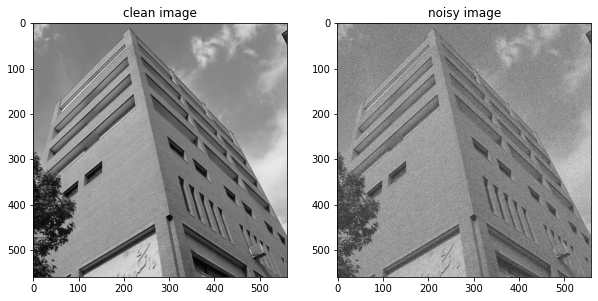

In [4]:
image_clean = imageio.imread('EE.png')[:, :].astype('float32')
image_noisy = imageio.imread('EE_noisy.png')[:, :].astype('float32')

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('clean image')
plt.imshow(image_clean, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('noisy image')
plt.imshow(image_noisy, cmap='gray')
plt.show()

<div dir="rtl"> <font size="4" face="HM XNiloofar">
در این بخش از تمرین با استفاده از یادگیری واژه‌نامه، سیستمی به منظور نویززدایی تصاویر مقیاس خاکستری توسعه خواهید داد [1]. 
</font> </div>

[1] Elad, M. and Aharon, M., 2006. Image denoising via sparse and redundant representations over learned dictionaries. IEEE Transactions on Image processing, 15(12), pp.3736-3745.

<div dir="rtl"> <font size="4" face="HM XNiloofar">
    <br />
تصویر مقیاس خاکستری Y را می‌توان به صورت یک ماتریس r×c در نظر گرفت که هر مولفه آن عدد صحیحی در بازه [0,255] اختیار می‌نماید. یکی از نویزهای رایج در تصاویر، نویز گاوسی جمع‌شونده است که در نتیجه آن تصویر نویزی Y_n=Y+N در اختیار شما قرار می‌گیرد که N ماتریس نویز است. در سیستم نویززدایی مورد نظر در این تمرین، فرض می‌شود که قطعات هم‌اندازه در تصویر Y با ابعاد p×p از یک مدل تنک تولید شده‌اند. از آنجایی که تصویر اصلی در اختیار شما قرار ندارد، باید با استفاده از قطعات تصویر در Y_n، واژه‌نامه‌ای که قطعات تصویر اصلی از آن تولید شده‌اند را تخمین بزنید. سپس از این واژه‌نامه برای نویززدایی قطعات تصویر Y_n استفاده کنید. به این منظور در ادامه بخش‌های مختلف سیستم را پیاده‌سازی می‌نمایید و در انتها نیز با کنار هم قرار دادن این بخش‌ها، سیستم نهایی پیاده‌سازی خواهد گردید.
</font> </div>

## 1. Create dataset



```
# This is formatted as code
```

<div dir="rtl"> <font size="4" face="HM XNiloofar">
    <b>
    ساخت پایگاه داده یادگیری واژه‌نامه:
    </b>
    <br />
        در این گام باید تابع <code>create_dataset</code> را پیاده‌سازی نمایید. ورودی‌های این تابع عبارتند از: 
<ul>
  <li> <code>image_noisy</code>:	تصویر نویزی با ابعاد r×c که هر مولفه آن عدد صحیحی در بازه [0,255] است و نوع آن <code>float32</code> است.</li>
  <li> <code>p</code>: طول قطعات تصویر.</li>
</ul>
 خروجی این تابع عبارتست از:
<ul>
<li><code>dataset</code>: 	پایگاه داده که یک ماتریس با ابعاد p^2×((r-p+1)(c-p+1)) است. هر ستون یکی از قطعات تصویر است که برداری شده است. از آنجایی که سایز تصویر r×c است و طول قطعات برابر با p است، در نتیجه در کل تصویر نویزی (r-p+1)(c-p+1) قطعه خواهیم داشت. هر قطعه نیز یک ماتریس مربعی p×p  است که با برداری‌سازی آن، برداری به طول p^2 خواهیم داشت . </li>
</ul>
 به منظور درستی پیاده‌سازی، به نکات زیر توجه نمایید.
 <ul>
  <li>	قطعه اول تصویر زیر ماتریس <code>image_noisy[0:8,0:8]</code> و قطعه دوم <code>image_noisy[0:8,1:9]</code> می‌باشد. یعنی قطعات به صورت سطری جلو می‌روند. </li>
  <li>	برای برداری‌سازی قطعات تصویر، سطرها را به صورت بردار عمودی در آورده و به ترتیب زیر هم قرار دهید تا یکی از ستون‌های ماتریس <code>dataset</code> را بسازد.</li>
     <li> 	برای پیاده‌سازی بهینه از تابع <code>extract_patches_2d</code> بهره ببرید. </li>
</ul>
</font> </div>

In [5]:
from sklearn.feature_extraction import image
from sklearn.datasets import load_sample_image
from scipy import linalg

In [6]:
def create_dataset(image_noisy, p):
    
    # TODO
    dataset = np.reshape(image.extract_patches_2d(image_noisy,(p,p)),(p**2,-1))
    
    return dataset

## 2. Initialize dictionary

<div dir="rtl"> <font size="4" face="HM XNiloofar">
    <b>
   مقداردهی اولیه واژه‌نامه: 
    </b>
    <br />
مقداردهی اولیه واژه‌نامه از مراحلی است که می‌تواند کیفیت نویززدایی را تحت تاثیر قرار دهد. این واژه‌نامه می‌تواند با استفاده از DCT فوق کامل مقداردهی اولیه شود. در این تمرین به منظور ساده‌سازی همراه با سوالات تمرین یک واژه‌نامه نیز در اختیار شما قرار گرفته است که می‌توانید برای تست کار خود از آن استفاده نمایید. شما کافیست تابعی بنویسید که با دریافت آدرس واژه‌نامه، آن را لود کرده و در متغیر <code>init_dictionary</code> قرار داده و به خروجی بدهد. بنابراین ورودی این تابع عبارتست از:   
<ul>
  <li><code>address</code>:		آدرس واژه‌نامه اولیه </li>
</ul>
 خروجی این تابع عبارتست از:
<ul>
<li><code>init_dictionary</code>: 		واژه‌نامه اولیه </li>
</ul>
</font> </div>

In [7]:
def create_init_dictionary(address):
    
    # TODO
    init_dictionary = np.load(address)
    
    return init_dictionary

## 3. Learn dictionary

<div dir="rtl"> <font size="4" face="HM XNiloofar">
    <b>
  یادگیری واژه‌نامه: 
    </b>
    <br />در این بخش شما می‌بایست تابع <code>train_dictionary</code> را پیاده‌سازی نمایید. در گام نمایش تنک برای یک بردار دلخواه y_i از مجموعه آموزش می‌بایست نمایش تنک x_i را با حل مساله زیر به دست آورید:
 </font> </div>   
    
$$ x_i= \text{argmin}_x ‖x‖_0    \text{ subject to }   ‖y_i-Dx‖_2^2/l≤(\text{sigma}×\text{noise_gain})^2  $$

<div dir="rtl"> <font size="4" face="HM XNiloofar">
    <br />
که در رابطه فوق D ماتریس واژه‌نامه، <code>sigma</code> تخمین واریانس نویز گاوسی جمع‌شوند، <code>noise_gain</code> بهره نویز و l طول بردار y_i است.
<br />   
در این تابع برای گام نمایش تنک و به‌روزرسانی واژه‌نامه می‌بایست روش‌های مختلفی را پیاده‌سازی نمایید. برای گام نمایش تنک می‌بایست روش‌های زیر را پیاده‌سازی نمایید:
<ul>
  <li><code>MP</code>:	روش جستجوی انطابق </li>
  <li><code>OMP</code>:	روش جستجوی انطابق متعامد </li>
  <li><code>BOMP</code>: روش جستجوی انطابق متعامد دسته‌ای [2]</li>
</ul>
    برای گام به‌روزرسانی واژه‌نامه نیز می‌بایست دور روش زیر پیاده‌سازی شوند:
<ul>
  <li><code>AKSVD</code>:		تقریب الگوریتم [2] KSVD  </li>
  <li><code>MOD</code>:		الگوریتم MOD </li>
</ul>  
    توجه: در الگوریتم <code>MOD</code> امکان دارد ماتریس XX^T معکوس‌پذیر نباشد. به منظور رفع این مشکل از تنظیم کننده تیخونوف استفاده نمایید و به جای معکوس‌گیری از XX^T  از ماتریس I+XX^T  معکوس بگیرید.
<br />     
    بنابراین ورودی‌های این تابع عبارتست از:
<ul>
  <li><code>init_dictionary</code>:	واژه‌نامه اولیه </li>
  <li><code>dataset</code>:	پایگاه داده </li>
  <li><code>iter_num</code>:	تعداد تکرارهای یادگیری واژه‌نامه </li>
  <li><code>sigma</code>:	تخمین واریانس نویز </li>
  <li><code>noise_gain</code>:	بهره نویز </li>
  <li><code>SC_method</code>:	روش مورد استفاده برای نمایش تنک </li>
  <li><code>DL_method</code>:	روش مورد استفاده برای به‌روزرسانی واژه‌نامه </li>
</ul>
 خروجی‌های این تابع عبارتست از:
<ul>
  <li><code>final_dictionary</code>:		واژه‌نامه آموزش داده شده </li>
  <li><code>X</code>:		نمایش قطعات تصویر پایگاه داده در واژه‌نامه آموزش داده شده 
</ul>    
</font> </div>    
    
[2] Rubinstein, R., Zibulevsky, M. and Elad, M., 2008. Efficient implementation of the K-SVD algorithm using batch orthogonal matching pursuit (No. CS Technion report CS-2008-08). Computer Science Department, Technion.

In [8]:
def train_dictionary(init_dictionary, dataset, iter_num, sigma, noise_gain, SC_method, DL_method):
    D = init_dictionary
    Y = dataset
    for iter in range(iter_num):
        print('iter %d'%iter)
        X = sparse_coding(D, Y, tol=sigma * noise_gain, SC_method=SC_method)
        D, X = dictionary_update(D, Y, X, DL_method=DL_method)
    final_dictionary = D
    return (final_dictionary, X)


def sparse_coding(D, Y, tol, SC_method):
    if SC_method.upper() == 'MP':
        X = MP(D, Y, tol)
    elif SC_method.upper() == 'OMP':
        X = OMP(D, Y, tol)
    elif SC_method.upper() == 'BOMP':
        X = BOMP(D, Y, tol)
    return X


def dictionary_update(D, Y, X, DL_method):
    if DL_method.upper() == 'AKSVD':
        D, X = AKSVD(D, Y, X)
    elif DL_method.upper() == 'MOD':
        D, X = MOD(D, Y, X)
    return (D, X)


def corr(x,y):
    return abs(x.dot(y))/np.sqrt((x**2).sum())

def MP(D, Y, tol):
    
    # TODO
    L  = D.shape[1]
    column = Y.shape[1]
    x = np.zeros((L,1))
    X = np.zeros(Y.shape)
    S = []

    for i in range(column):
        r = Y[:,i]
        while np.linalg.norm(r) > tol:
              corrs = np.array([])
              for j in range(D.shape[1]):
                   C = corr(D[:,j],r)
                   corrs = np.concatenate((corrs,C),axis=None)

              ind = np.argmax(corrs)

              S.append(ind)
        
              Zj = (D[:,ind].T.dot(r))/(D[:,ind].T.dot(D[:,ind]))

              x = x + Zj

              q = Zj*D[:,j]
              r = r-q
        X[:,i] = x
    
    return X



def OMP(D, Y, tol):
    
    # TODO
    L  = D.shape[1]
    X = np.zeros(L)
    error = Y
    S = []

    while np.linalg.norm(error) > tol:
        
        corrs = [ corr(d,error) for d in D.T]
        ind = np.argmax(corrs)
        S.append(ind)
        
        Ds = D[:,S]

        Xs = np.linalg.inv(Ds.T.dot(Ds)).dot(Ds.T).dot(Y)
    
        X[S] = Xs
        
        error = Y-D.dot(X)

    return X


def BOMP(D, Y, tol):
    # TODO
    Alpha = np.dot(D.T, Y)
    G = np.dot(D.T, D)
    func = lambda a: unsparse(*_batch_omp_step(G, a, Y, tol), length=D.shape[1])
    X = np.apply_along_axis(func, axis=0, arr=Alpha)   
    return X

def unsparse(v, idx, length):
    x = np.zeros(length)
    x[idx] = v
    return x

def _batch_omp_step(G, alpha_0, Y, tol):
    idx = []
    L = np.ones((1, 1))
    alpha = alpha_0
    error = np.dot(Y.T, Y)
    n = 0
    wnorm = np.zeros((1,100))
    
    
    while error > tol :
        lam = np.abs(alpha).argmax()
        if n > 0:
            w = linalg.solve_triangular(L, G[idx, lam])
            L = np.r_[np.c_[L, np.zeros(len(L))],
                      np.atleast_2d(np.append(w, np.sqrt(1 - np.inner(w, w))))]
        idx.append(lam)
        gamma = linalg.solve(np.dot(L, L.T), alpha_0[idx], sym_pos=True) 
        alpha = alpha_0 - np.dot(G[:, idx], gamma)
        
        n = n + 1
        
        wnorm[0,n] = gamma.T*np.dot(G[:, idx], gamma)
        error = error + wnorm[0,n-1] - wnorm[0,n]
        
    return gamma, idx 




def AKSVD(D, Y, X):
    
    # TODO
    indx = []
    D_new = np.zeros(D.shape[0],D.shape[1])
    
    for i in range(X.shape[0]):
        if np.count_nonzero(X[i,:]==0)!=X.shape[1]:
             indx  = np.append(indx, i)
        
        
    for i in range(D.shape[1]):
            Dp = np.delete(D,i,1)
            Xp = np.delete(X,i,0)
            Y_h = Y- Dp*Xp
            Y_h_js = Y_h[:,indx]
            
            u,s,vh = np.linalg.svd(Y_h_js)
            D_new = u[:,1]
            
    D = D_new
        
    return (D, X)




def MOD(D, Y, X):
    
    # TODO
    n = X.shape[0]
    D = Y*X.T*np.linalg.inv(0.1*np.identity(n)+X.dot(X.T))
    
    return (D, X)



In [ ]:
image_denoised, image_noisy, D_MP_MOD, X_MP_MOD = DL_denoising('EE_noisy.png', 'random_dictionary_64_121.npy', p=8, iter_num=20, sigma=20, noise_gain=1.075, SC_method='MP', dl_method='MOD', m=0.5)




iter 0


## 4. Reconstruct image

<div dir="rtl"> <font size="4" face="HM XNiloofar">
    <b>
بازسازی تصویر: 
    </b>
    <br />
    در قسمت قبل شما توانستید نمایش تمام قطعات تصویر در واژه‌نامه نهایی (<code>final_dictionary</code>) را به دست آورید. در این قسمت به‌جای هر قطعه از تصویر، بازسازی شده آن را جایگزین می‌نمایید. فرض کنید x_i نمایش یک قطعه برداری شده از تصویر در واژه‌نامه نهایی (D_f) باشد. در این صورت تخمین بدون نویز از آن قطعه برداری شده را می‌توان به صورت D_f x_i ساخت و با استفاده از عملیات معکوس برداری‌سازی (تبدیل بردارها به قطعات تصویر)، می‌توان تخمینی از قطعه تصویر بدون نویز به دست آورد. از آنجایی که شما تمام قطعات قابل استخراج از تصویر را در قسمت الف در نظر گرفتید، بنابراین هر پیکسل از تصویر در تعدادی از قطعات قرار می‌گیرد (پیکسل‌های مرکزی دقیقا در p^2 قطعه و پیکسل‌های حاشیه‌ای در کمتر از این مقدار قطعه تصویر حضور دارند). به منظور نویززدایی بهتر می‌توان متوسط تمام تخمین‌ها از یک پیکسل را در نظر گرفت. به عبارت دیگر یک ماتریس O و یک ماتریس C صفر در نظر بگیرید. حال هر یک از قطعات نویزدایی شده را با بخشی از ماتریس O که متناظر با آن است جمع نمایید. همزمان به بخش متناظر با قطعه تصویر در ماتریس C نیز یک واحد اضافه کنید. پس از قرار دادن تمام قطعات نویز زدایی شده، اگر ماتریس O را به صورت عنصر به عنصر بر ماتریس C تقسیم نمایید، خروجی مورد نظر به دست می‌آید. 
    <br />
    روال فوق معمولا منجر به بایاس در تصویر حاصل می‌گردد. به منظور کاهش این بایاس نیز ضریبی از تصویر نویزی با خروجی حاصل از الگوریتم فوق ترکیب می‌شود. فرض کنید طبق روال فوق، O و C را به دست آورده‌اید. خروجی نهایی از رابطه زیر به دست خواهد آمد:
    <center><code>image_denoised =  (O + m × image_noisy) / (C + m)</code></center>
در این گام شما می‌بایست تابع بازسازی تصویر با نام <code>reconstruct_image</code> را پیاده‌سازی نمایید. این تابع ورودی‌های زیر را می‌پذیرد:
<ul>
  <li><code>final_dictionary</code>:	واژه‌نامه آموزش داده شده </li>
  <li><code>X</code>:   	نمایش قطعات تصویر پایگاه داده در واژه‌نامه آموزش داده شده </li>
  <li><code>image_noisy</code>:   	تصویر نویزی با ابعاد r×c که هر مولفه آن عددی صحیحی در بازه [0,255] است و نوع آن <code>float32</code> است. </li>
  <li><code>p</code>:  	طول قطعات تصویر</li>
   <li><code>m</code>:  	ثابت ترکیب تصویر نویزی</li>
</ul>
 خروجی این تابع عبارتست از:
<ul>
<li><code>image_denoised</code>:	تصویر نویززدایی شده با ابعاد r×c که هر مولفه آن عددی صحیحی در بازه [0,255] است و نوع آن <code>float32</code> است.</li>
</ul>
</font> </div>

In [9]:
def reconstruct_image(final_dictionary, X, image_noisy, p, m):
    
    # TODO
    M1 = np.zeros(image_noisy.shape)
    M2 = np.zeros(image_noisy.shape)

    M1_patch = image.extract_patches_2d(M1,(p,p))
    M2_patch = image.extract_patches_2d(M2,(p,p))

    noisy_patch = image.extract_patches_2d(image_noisy,(p,p))

    y_final = final_dictionary*X

    column = y_final.shape[1]

    for i in range(column):

      patch = np.reshape(y_final[:,i],(p,p))
      M1_patch[i] = M1_patch[i] + (patch + m*noisy_patch)
      M2_patch[i] = M2_patch[i] + 1

    image_denoised = M1_patch/M2_patch
    
    return image_denoised

## 5. Evaluation

<div dir="rtl"> <font size="4" face="HM XNiloofar">
حال  تمام ماژول‌های مورد نیاز برای ساخت سیستم نویززدایی را در اختیار دارید. تابع <code>DL_denoising</code> سیستم‌ فوق را یکپارچه می‌نماید و خروجی شما را می‌سازد.
<br />    
به منظور اینکه بتوانید پیاده‌سازی خود را چک نمایید، یک تصویر نویز پاک (<code>EE.png</code>) یک نمونه نویزی شده آن با انحراف معیار 20 (<code>EE_noisy.png</code>) و یک دیکشنری اولیه تصادفی (<code>random_dictionary_64_121.npy</code>) در اختیار شما قرار گرفته است. نتایج حاصل از نویززدایی این تصویر برای حالت‌های مختلف مختلف مشاهده کنید. در هر حالت ماتریس <code>D</code> و <code>X</code> خروجی را در Google Drive آپلود کنید. فایل‌ها را در حالت دسترسی عمومی قرار دهید. ID لینک هر فایل را در محل مربوطه بنویسید. با اجرای cell مربوطه باید هر شخصی بتواند فایل‌ها را دانلود و نتیجه نهایی را بازتولید کند.
 </font> </div>   

In [10]:
def DL_denoising(address_image_noisy, address_init_dictionary, p, iter_num, sigma, noise_gain, SC_method, dl_method, m):
    image_noisy = imageio.imread(address_image_noisy)[:, :].astype('float32')
    dataset = create_dataset(image_noisy, p)
    D = create_init_dictionary(address_init_dictionary)
    D, X = train_dictionary(D, dataset, iter_num, sigma, noise_gain, SC_method, dl_method)
    image_denoised = reconstruct_image(D, X, image_noisy, p, m)
    return (image_denoised, image_noisy, D, X)

def Calculate_PSNR(image1, image2):
    mse = np.sum((image1-image2)**2)/np.prod(image1.shape)
    return 10*np.log10((255**2)/mse)

In [ ]:
image_denoised, image_noisy, D_MP_MOD, X_MP_MOD = DL_denoising('EE_noisy.png', 'random_dictionary_64_121.npy', p=8, iter_num=20, sigma=20, noise_gain=1.075, SC_method='MP', dl_method='MOD', m=0.5)
np.save('D_MP_MOD', D_MP_MOD)
np.save('X_MP_MOD', X_MP_MOD)

image_denoised, image_noisy, D_OMP_MOD, X_OMP_MOD = DL_denoising('EE_noisy.png', 'random_dictionary_64_121.npy', p=8, iter_num=20, sigma=20, noise_gain=1.075, SC_method='OMP', dl_method='MOD', m=0.5)
np.save('D_OMP_MOD', D_OMP_MOD)
np.save('X_OMP_MOD', X_OMP_MOD)

image_denoised, image_noisy, D_BOMP_MOD, X_BOMP_MOD = DL_denoising('EE_noisy.png', 'random_dictionary_64_121.npy', p=8, iter_num=20, sigma=20, noise_gain=1.075, SC_method='BOMP', dl_method='MOD', m=0.5)
np.save('D_BOMP_MOD', D_BOMP_MOD)
np.save('X_BOMP_MOD', X_BOMP_MOD)

image_denoised, image_noisy, D_MP_AKSVD, X_MP_AKSVD = DL_denoising('EE_noisy.png', 'random_dictionary_64_121.npy', p=8, iter_num=20, sigma=20, noise_gain=1.075, SC_method='MP', dl_method='AKSVD', m=0.5)
np.save('D_MP_AKSVD', D_MP_AKSVD)
np.save('X_MP_AKSVD', X_MP_AKSVD)

image_denoised, image_noisy, D_OMP_AKSVD, X_OMP_AKSVD = DL_denoising('EE_noisy.png', 'random_dictionary_64_121.npy', p=8, iter_num=20, sigma=20, noise_gain=1.075, SC_method='OMP', dl_method='AKSVD', m=0.5)
np.save('D_OMP_AKSVD', D_OMP_AKSVD)
np.save('X_OMP_AKSVD', X_OMP_AKSVD)

image_denoised, image_noisy, D_BOMP_AKSVD, X_BOMP_AKSVD = DL_denoising('EE_noisy.png', 'random_dictionary_64_121.npy', p=8, iter_num=20, sigma=20, noise_gain=1.075, SC_method='BOMP', dl_method='AKSVD', m=0.5)
np.save('D_BOMP_AKSVD', D_BOMP_AKSVD)
np.save('X_BOMP_AKSVD', X_BOMP_AKSVD)

# upload the saved files to Google Drive, then their access to 'Everyone with the link'. 


In [ ]:
plt.figure(figsize=(10,20))

plt.subplot(4, 2, 1)
plt.title('image_clean')
plt.imshow(image_clean, cmap='gray')

psnr = Calculate_PSNR(image_clean, image_noisy)
print('\n image_noisy')
print(psnr)
print(psnr >= 24)
plt.subplot(4, 2, 2)
plt.title('image_noisy ' + str(np.around(psnr, 3)))
plt.imshow(image_noisy, cmap='gray')

p = 8
m = 0.5

# --------------- MP_MOD --------------- #
# download D
!gdown # TODO
# download X
!gdown # TODO

D = np.load('D_MP_MOD.npy')
X = np.load('X_MP_MOD.npy')
image_denoised = reconstruct_image(D, X, image_noisy, p, m)
psnr = Calculate_PSNR(image_clean, image_denoised)
print('\n MP+MOD')
print(psnr)
print(psnr >= 24)
plt.subplot(4, 2, 3)
plt.title('MP+MOD ' + str(np.around(psnr, 3)))
plt.imshow(image_denoised, cmap='gray')

# --------------- OMP_MOD --------------- #
# download D
!gdown # TODO
# download X
!gdown # TODO

D = np.load('D_OMP_MOD.npy')
X = np.load('X_OMP_MOD.npy')
image_denoised = reconstruct_image(D, X, image_noisy, p, m)
psnr = Calculate_PSNR(image_clean, image_denoised)
print('\n OMP+MOD')
print(psnr)
print(psnr >= 24)
plt.subplot(4, 2, 4)
plt.title('OMP+MOD ' + str(np.around(psnr, 3)))
plt.imshow(image_denoised, cmap='gray')

# --------------- BOMP_MOD --------------- #
# download D
!gdown # TODO
# download X
!gdown # TODO

D = np.load('D_BOMP_MOD.npy')
X = np.load('X_BOMP_MOD.npy')
image_denoised = reconstruct_image(D, X, image_noisy, p, m)
psnr = Calculate_PSNR(image_clean, image_denoised)
print('\n BOMP+MOD')
print(psnr)
print(psnr >= 24)
plt.subplot(4, 2, 5)
plt.title('BOMP+MOD ' + str(np.around(psnr, 3)))
plt.imshow(image_denoised, cmap='gray')


# --------------- MP_AKSVD --------------- #
# download D
!gdown # TODO
# download X
!gdown # TODO

D = np.load('D_MP_AKSVD.npy')
X = np.load('X_MP_AKSVD.npy')
image_denoised = reconstruct_image(D, X, image_noisy, p, m)
psnr = Calculate_PSNR(image_clean, image_denoised)
print('\n MP+AKSVD')
print(psnr)
print(psnr >= 24)
plt.subplot(4, 2, 6)
plt.title('MP+AKSVD ' + str(np.around(psnr, 3)))
plt.imshow(image_denoised, cmap='gray')

# --------------- OMP_AKSVD --------------- #
# download D
!gdown # TODO
# download X
!gdown # TODO

D = np.load('D_OMP_AKSVD.npy')
X = np.load('X_OMP_AKSVD.npy')
image_denoised = reconstruct_image(D, X, image_noisy, p, m)
psnr = Calculate_PSNR(image_clean, image_denoised)
print('\n OMP+AKSVD')
print(psnr)
print(psnr >= 24)
plt.subplot(4, 2, 7)
plt.title('OMP+AKSVD ' + str(np.around(psnr, 3)))
plt.imshow(image_denoised, cmap='gray')

# --------------- BOMP_AKSVD --------------- #
# download D
!gdown # TODO
# download X
!gdown # TODO

D = np.load('D_BOMP_AKSVD.npy')
X = np.load('X_BOMP_AKSVD.npy')
image_denoised = reconstruct_image(D, X, image_noisy, p, m)
psnr = Calculate_PSNR(image_clean, image_denoised)
print('\n BOMP+AKSVD')
print(psnr)
print(psnr >= 24)
plt.subplot(4, 2, 8)
plt.title('BOMP+AKSVD ' + str(np.around(psnr, 3)))
plt.imshow(image_denoised, cmap='gray')

plt.show()

---

# Give Us Feedback

In [ ]:
from ipywidgets import Label, IntSlider, Textarea, Button, Layout, HBox, VBox
from IPython.display import clear_output

IntSlider_list = {i:IntSlider(value=3, min=1, max=5) for i in range(5)}
H1 = HBox([Label("How was the homework?")])
H2 = HBox([Label("Please rate the homework from 1 to 5 (lowest to highest).")])
H3 = HBox([Label("The assignment was instructive.", layout=Layout(width="22%")), IntSlider_list[0]])
H4 = HBox([Label("It was not time consuming.", layout=Layout(width="22%")), IntSlider_list[1]])
H5 = HBox([Label("The questions were clear.", layout=Layout(width="22%")), IntSlider_list[2]])
H6 = HBox([Label("The homework was well organized.", layout=Layout(width="22%")), IntSlider_list[3]])
H7 = HBox([Label("Finally, you had a good vibe!", layout=Layout(width="22%")), IntSlider_list[4]])
textarea = Textarea(value='', placeholder='Any comments or suggestions', description='', disabled=False)
button = Button(description='Submit', disabled=False, button_style='', tooltip='Click me', icon='paper-plane')
H8 = HBox([textarea])
H9 = HBox([button])

def ff(button):
    button.button_style = 'success'
    score = sum([IntSlider_list[i].value for i in IntSlider_list]) / 5
    x = round(score*4)/4
    y = int(x) * '🌕' + ((x-int(x))==0 and not x==5) * '🌑' + ((x-int(x))==0.25) * '🌘' + ((x-int(x))==0.5) * '🌗' + ((x-int(x))==0.75) * '🌖' + (4-int(x)) * '🌑'
    clear_output(wait=True)
    display(VBox([H1, H2, H3, H4, H5, H6, H7, H8, H9]))
    print("Thank you for your feedback! 😊")
    print(f"Score: {y}")
    print("\nFeedback:",*[IntSlider_list[i].value for i in IntSlider_list])
    print(textarea.value)

button.on_click(ff)

VBox([H1, H2, H3, H4, H5, H6, H7, H8, H9])

In [ ]:
# To export jupyter notebook to html, save your notebook and run this cell
!jupyter nbconvert --to html PHW.ipynb

[NbConvertApp] Converting notebook PHW.ipynb to html
[NbConvertApp] Writing 410132 bytes to PHW.html
